In [1]:
# Sai Triveni Kottapalli
# ID - C00313481  

# Convolutional Neural Network

A **convolutional neural network** (CNN, or ConvNet) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other.

## Import dependencies

- [tensorflow](https://www.tensorflow.org/) - for developing and training ML models.
- [matplotlib](https://matplotlib.org/) - for plotting the data.
- [seaborn](https://seaborn.pydata.org/index.html) - for plotting confusion matrix.
- [numpy](https://numpy.org/) - for linear algebra operations.
- [pandas](https://pandas.pydata.org/) - for displaying training/test data in a table.
- [math](https://docs.python.org/3/library/math.html) - for calculating square roots etc.
- [datetime](https://docs.python.org/3.8/library/datetime.html) - for generating a logs folder names.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform
import keras

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', keras.__version__)

Python version: 3.10.5
Tensorflow version: 2.13.0
Keras version: 2.13.1


In [2]:
import warnings
warnings.filterwarnings("ignore")

## Load the data

The **training** dataset consists of 60000 28x28px images of hand-written digits from `0` to `9`.

The **test** dataset consists of 10000 28x28px images.

In [3]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [4]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [5]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


## Explore the data

Here is how each image in the dataset looks like. It is a 28x28 matrix of integers (from `0` to `255`). Each integer represents a color of a pixel.

In [6]:
pd.DataFrame(x_train[5])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,122,7,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,252,146,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,252,232,40,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,15,...,252,252,60,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,96,...,252,252,60,0,0,0,0,0,0,0


This matrix of numbers may be drawn as follows: 

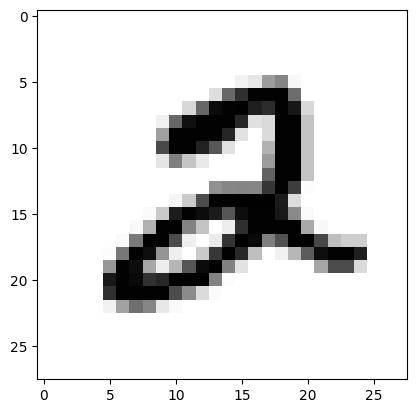

In [7]:
plt.imshow(x_train[5], cmap=plt.cm.binary)
plt.show()

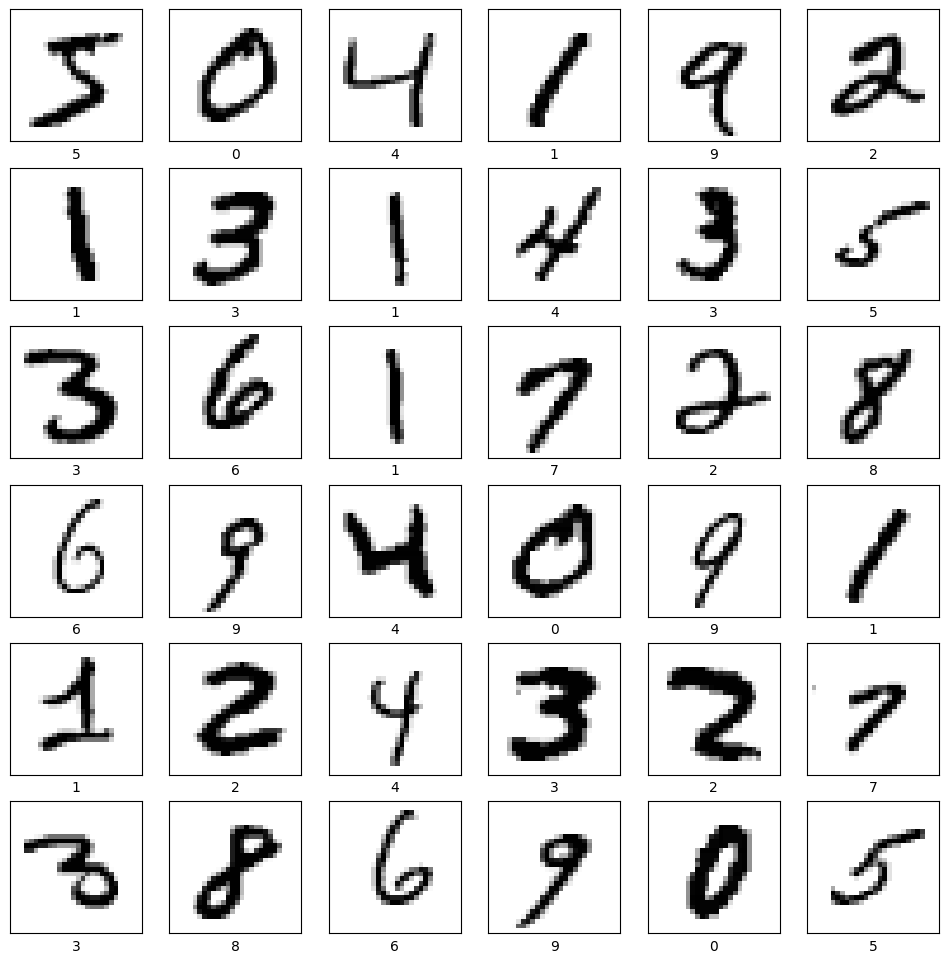

In [8]:
numbers_to_display = 36  
num_cells = math.ceil(math.sqrt(numbers_to_display))  
plt.figure(figsize=(12, 12))  
for i in range(numbers_to_display):  
    plt.subplot(num_cells, num_cells, i + 1)  
    plt.xticks([])  
    plt.yticks([])  
    plt.grid(False)  
    plt.imshow(x_train[i], cmap=plt.cm.binary)  
    plt.xlabel(y_train[i])  
plt.show()

## Reshaping the data

In [9]:
x_train_with_chanels = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [10]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (60000, 28, 28, 1)
x_test_with_chanels: (10000, 28, 28, 1)


## Normalize the data

In [11]:
x_train_normalized = x_train_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [12]:
x_train_normalized[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

## Build the model

In [13]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=3,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Conv2D(
    kernel_size=3,
    filters=32,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=256,
    activation=tf.keras.activations.relu
))

model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

## Compile the model

In [15]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

## Train the model

In [16]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 [==============================] - 26s 13ms/step - loss: 0.1482 - accuracy: 0.9546 - val_loss: 0.0522 - val_accuracy: 0.9841
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0535 - accuracy: 0.9840 - val_loss: 0.0355 - val_accuracy: 0.9879
Epoch 3/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0405 - accuracy: 0.9877 - val_loss: 0.0314 - val_accuracy: 0.9889
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0310 - accuracy: 0.9904 - val_loss: 0.0267 - val_accuracy: 0.9911
Epoch 5/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0257 - accuracy: 0.9916 - val_loss: 0.0291 - val_accuracy: 0.9905
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0195 - accuracy: 0.9937 - val_loss: 0.0298 - val_accuracy: 0.9917
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0177 - accuracy: 0.9945 - val_loss: 0.0331 -

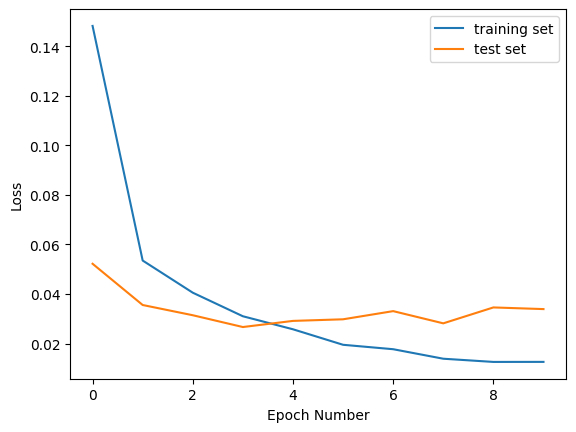

In [17]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

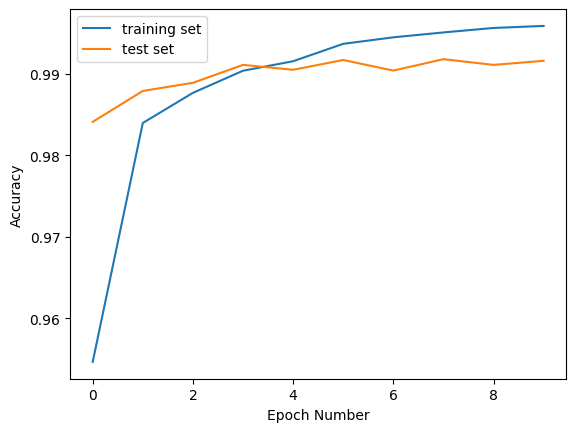

In [18]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

## Evaluate model accuracy

### Training set accuracy

In [19]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

In [20]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.004627146292477846
Training accuracy:  0.9986166954040527


### Test set accuracy

In [21]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)

In [22]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.03389377146959305
Validation accuracy:  0.991599977016449


## Save the model

In [23]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

In [24]:
loaded_model = tf.keras.models.load_model(model_name)

## Use the model (do predictions)

To use the model that we've just trained for digits recognition we need to call `predict()` method.

In [25]:
predictions_one_hot = loaded_model.predict([x_test_normalized])

313/313 [==============================] - 2s 5ms/step


In [26]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


Each prediction consists of 10 probabilities (one for each number from `0` to `9`). We need to pick the digit with the highest probability since this would be a digit that our model most confident with.

In [27]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,2.674131e-12,2.982065e-08,5.280790e-10,5.942702e-09,9.866634e-08,4.406592e-12,7.353953e-16,9.999993e-01,3.255782e-11,6.335496e-07
1,9.809409e-12,5.745914e-12,1.000000e+00,1.703609e-16,4.554988e-17,9.655036e-21,5.790281e-13,9.002691e-18,1.046641e-15,1.069478e-19
2,5.291029e-13,1.000000e+00,8.639886e-11,8.136640e-17,9.677128e-09,2.531062e-14,5.108326e-13,8.465381e-10,2.972558e-10,2.355956e-12
3,1.000000e+00,6.230852e-16,1.023343e-15,4.722204e-13,2.650506e-11,7.999965e-15,2.156177e-08,9.675524e-16,1.867381e-14,2.181964e-08
4,4.043649e-16,3.925418e-13,1.224935e-12,6.788025e-17,1.000000e+00,1.250584e-14,1.872107e-13,1.417961e-12,9.861028e-13,2.871411e-08
...,...,...,...,...,...,...,...,...,...,...
9995,2.235895e-15,1.084042e-10,1.000000e+00,3.471148e-12,8.232952e-19,5.739661e-19,9.690997e-17,6.323581e-12,1.022824e-12,5.707982e-18
9996,9.371005e-13,2.108449e-08,5.883426e-10,1.000000e+00,9.903164e-15,5.768027e-09,1.833976e-17,1.455638e-11,3.967863e-14,3.207714e-10
9997,1.160870e-23,2.697491e-13,1.724644e-16,2.774031e-23,1.000000e+00,1.155381e-18,4.774547e-19,1.921547e-13,7.567887e-12,1.929701e-13
9998,6.492770e-09,5.966259e-11,9.783115e-14,6.235222e-11,1.517811e-12,9.999968e-01,2.578423e-07,1.140794e-10,2.983682e-06,4.616666e-12


In [28]:
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [29]:
print(predictions[2])

1


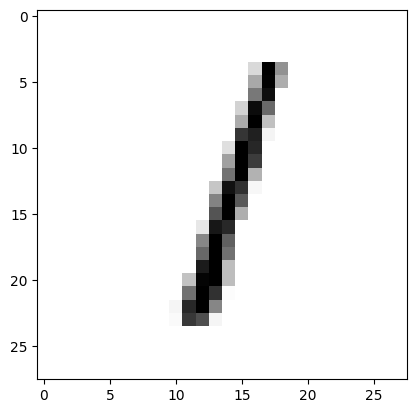

In [30]:
plt.imshow(x_test_normalized[2].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

We see that our model made a correct prediction and it successfully recognized digit `1`. Let's print some more test examples and correspondent predictions to see how model performs and where it does mistakes.

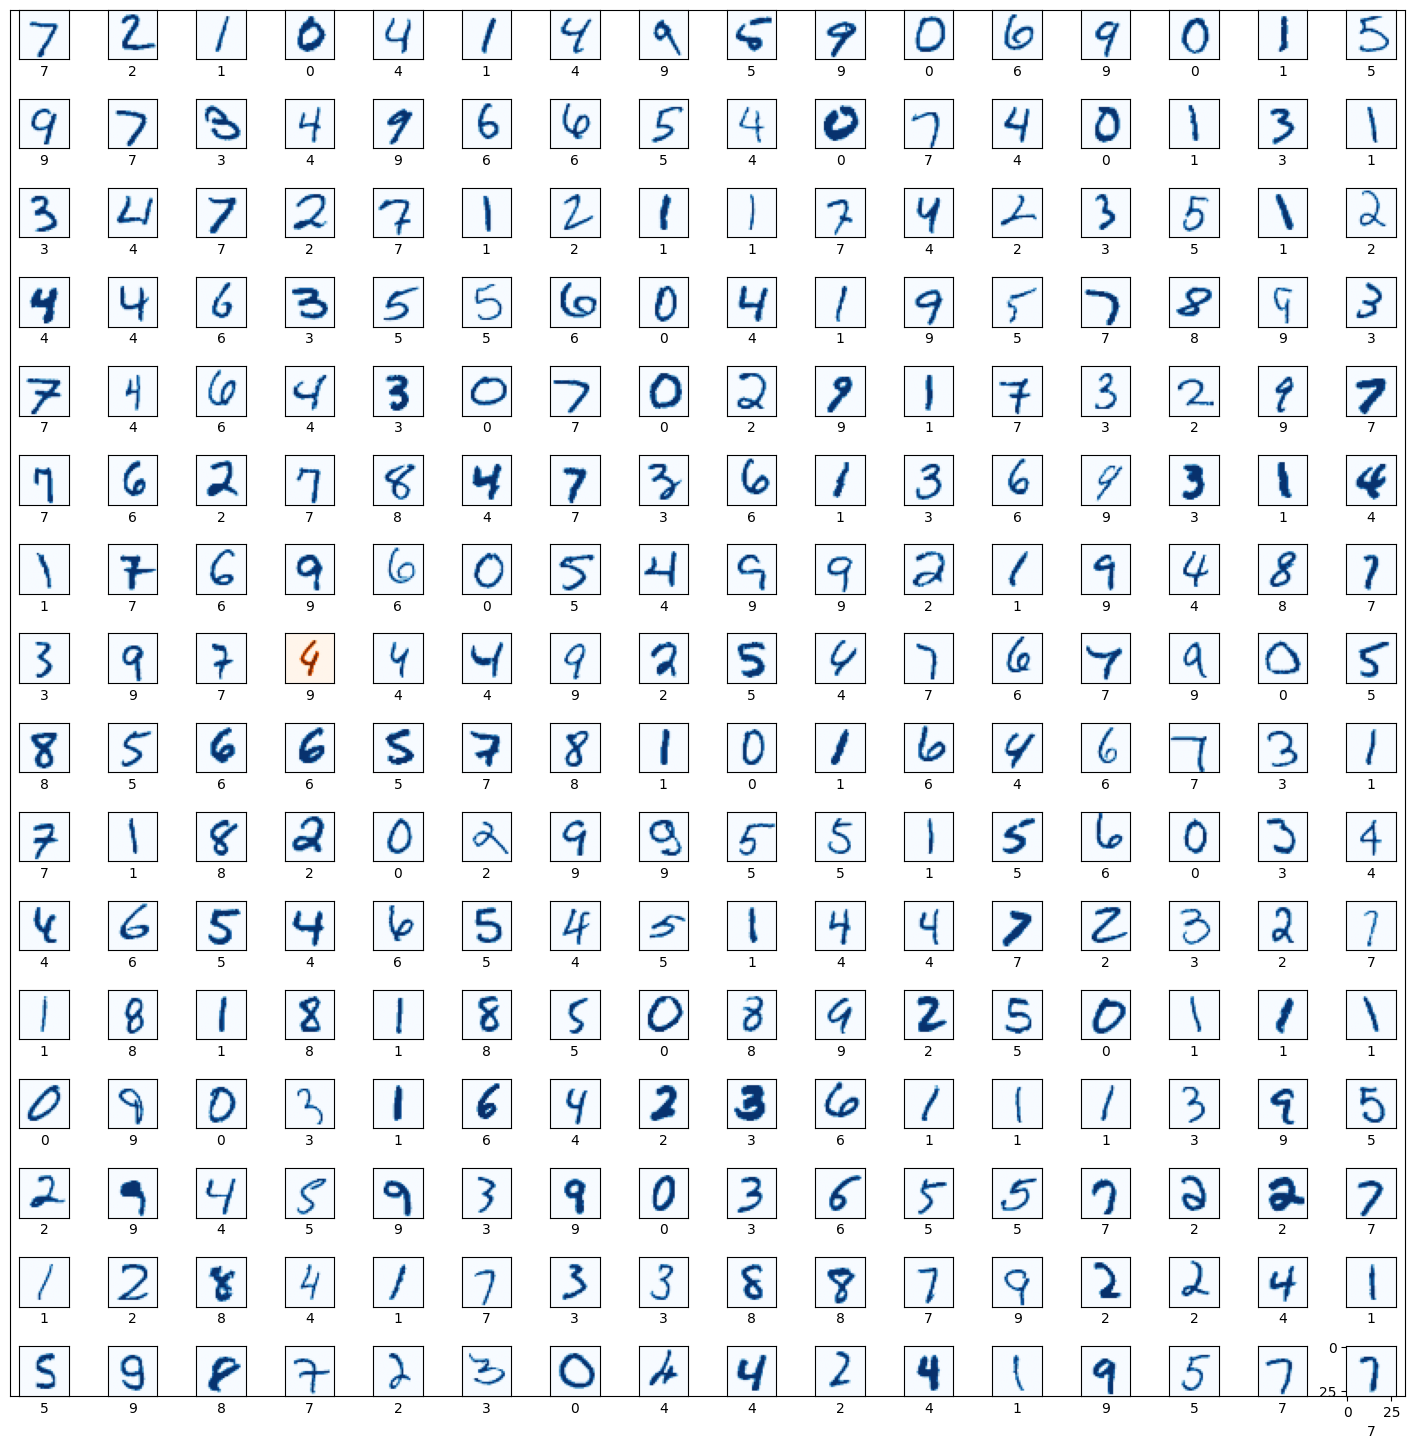

In [31]:
numbers_to_display = 256  
num_cells = math.ceil(math.sqrt(numbers_to_display))  
plt.figure(figsize=(18, 18))  

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]  
    plt.xticks([])  
    plt.yticks([])  
    plt.grid(False)  
    color_map = 'Blues' if predicted_label == y_test[plot_index] else 'Oranges'  # Changed colors  
    plt.subplot(num_cells, num_cells, plot_index + 1)  
    plt.imshow(x_test_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)  
    plt.xlabel(predicted_label)  

plt.subplots_adjust(hspace=0.8, wspace=0.3)  
plt.show()

## Plotting a confusion matrix

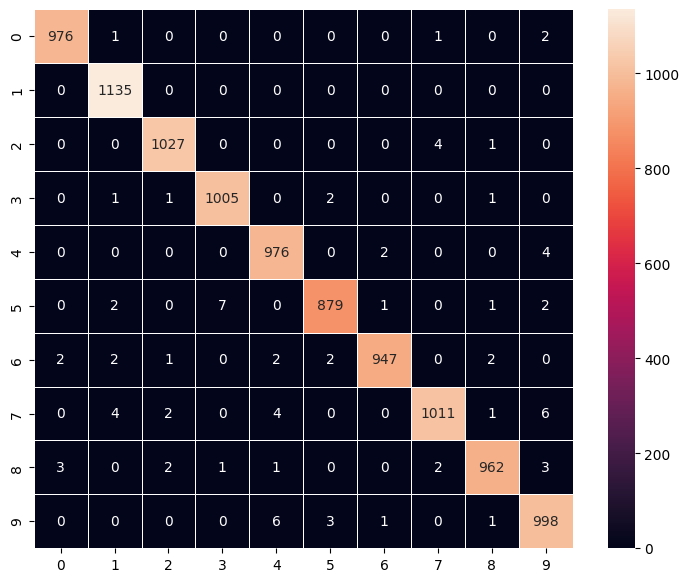

In [32]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()